<a href="https://colab.research.google.com/github/Shubhangidharmik/Play-store-app-review-analysis/blob/main/Shubhangi_Dharmik_Play_store_app_review_analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
#Import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python/Capstone Project 1/Copy of Play Store Data.csv')


In [ ]:
# top row of data
df1.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [ ]:
# bottom row of data
df1.tail(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
# find shape of database
df1.shape

(10841, 13)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


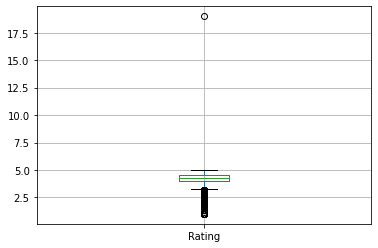

In [ ]:
df1.boxplot('Rating');


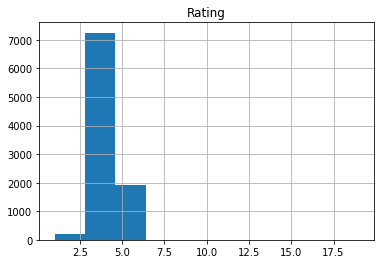

In [ ]:
df1.hist();

#**DATA CLEANING**

In [ ]:
# calculate null values
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# checking the outliers in the rating
pd.DataFrame(df1[df1['Rating']>5.0])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


 **Operation on Null values**

In [ ]:
# Replace NAN value from rating
df1['Rating'].fillna(df1['Rating'].median(), inplace=True)

In [ ]:
# drop NAN value from content rating and it will remove our outlier too
df1.dropna(how='any', subset=['Content Rating'], axis=0, inplace = True)

In [ ]:
# replace NAN values from type
df1['Type'].fillna(df1['Type'].mode()[0], inplace=True)

In [ ]:
# replace NAN values from android version
df1['Android Ver'].fillna(df1['Android Ver'].mode()[0], inplace=True)

In [ ]:
# replace NAN values from current version
df1['Current Ver'].fillna(df1['Current Ver'].mode()[0], inplace=True)

In [ ]:
# calculate null values
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
updated_df=df1

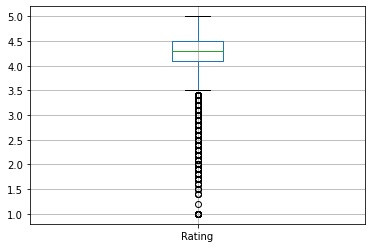

In [ ]:
updated_df.boxplot('Rating');

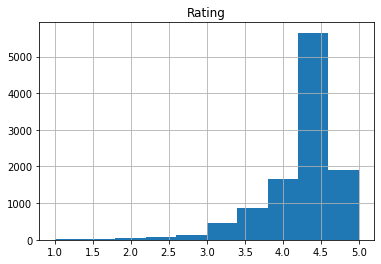

In [ ]:
updated_df.hist();

In [ ]:
df1[~df1['Rating'].isna()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
updated_df.shape

(10840, 13)

In [ ]:
updated_df.describe()

,Rating
count,10840.000000
mean,4.206476
std,0.480342
min,1.000000
25%,4.100000
50%,4.300000
75%,4.500000
max,5.000000


In [ ]:
# columns in the database
updated_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

#**Data Manipulation**

**change datatype and also sign $ from price**

In [ ]:
# Remove $ from price
updated_df['Price_1']=updated_df['Price'].str.replace('$','')

In [ ]:
# to check $ sign romove or not
updated_df[235:240]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price_1
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,4.99
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device,0
237,Zenefits,BUSINESS,4.2,296,14M,"50,000+",Free,0,Everyone,Business,"June 15, 2018",3.2.1,4.1 and up,0
238,Google Ads,BUSINESS,4.3,29313,20M,"5,000,000+",Free,0,Everyone,Business,"July 30, 2018",1.12.0,4.0.3 and up,0
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up,0


In [ ]:
# datatype of price
updated_df['Price_1'].dtype

dtype('O')

In [ ]:
updated_df['Price_1']=updated_df['Price_1'].astype('float')

In [ ]:
updated_df['Price_1'].dtype

dtype('float64')

**Change datatype of Reviews**

In [ ]:
updated_df['Reviews'].dtype

dtype('O')

In [ ]:
updated_df['Reviews'] = updated_df['Reviews'].astype('float')

In [ ]:
updated_df['Reviews'].dtype

dtype('float64')

**Change datatype and remove + and , from Installs**

In [ ]:
pd.DataFrame(updated_df['Installs'].head(1))

,Installs
0,"10,000+"


In [ ]:
updated_df['Installs'].dtype

dtype('O')

In [ ]:
# Remove + and , from Installs and also change datatype from object to float
updated_df['Installs_1']=updated_df['Installs'].str.replace('+','')
updated_df['Installs_2']=updated_df['Installs_1'].str.replace(',','')

In [ ]:
pd.DataFrame(updated_df['Installs_2']).head(1)

,Installs_2
0,10000


In [ ]:
updated_df['Installs_2'] = updated_df['Installs_2'].astype('float')

In [ ]:
updated_df['Installs_2'].dtype

dtype('float64')

#**DATA VISUALIZATION**

In [ ]:
# top 5 maximum price of apps in data 
max_price=pd.DataFrame(updated_df['Price_1'].sort_values(ascending=False))

In [ ]:
max_price.head()

,Price_1
4367,400.00
5362,399.99
5351,399.99
5356,399.99
5369,399.99


In [ ]:
max_price.tail()

,Price_1
7074,0.0
7073,0.0
7072,0.0
7071,0.0
0,0.0


In [ ]:
max_price_for_app=updated_df[updated_df['Price_1']==updated_df['Price_1'].max()]

In [ ]:
# find name of app which has maximum price
max_price_for_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price_1,Installs_1,Installs_2
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3M,"10,000+",Paid,$400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,400.0,"10,000",10000.0


In [ ]:
# Top 5 apps which has maximum prices.
max_price_for_app=updated_df.nlargest(5,['Price_1'])

In [ ]:
max_price_for_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price_1,Installs_1,Installs_2
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3M,"10,000+",Paid,$400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,400.00,"10,000",10000.0
4197,most expensive app (H),FAMILY,4.3,6.0,1.5M,100+,Paid,$399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up,399.99,100,100.0
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26M,"10,000+",Paid,$399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,399.99,"10,000",10000.0
5351,I am rich,LIFESTYLE,3.8,3547.0,1.8M,"100,000+",Paid,$399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,399.99,"100,000",100000.0
5354,I am Rich Plus,FAMILY,4.0,856.0,8.7M,"10,000+",Paid,$399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up,399.99,"10,000",10000.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


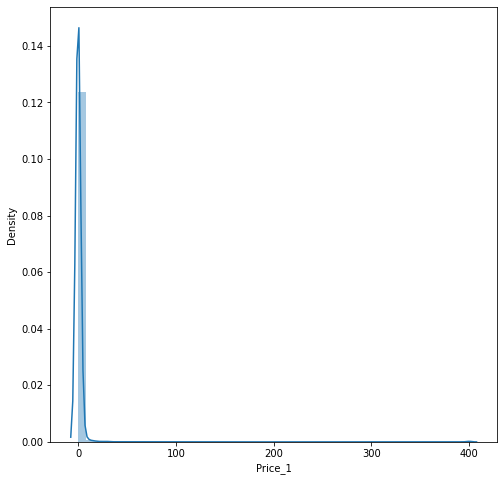

In [ ]:
sns.distplot(updated_df['Price_1']);
plt.show();

**Number of app contains in each category**

In [ ]:
# Number of apps in each category
number_of_app_in_each_category = pd.DataFrame(updated_df['Category'].value_counts())

In [ ]:
number_of_app_in_each_category

,Category
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384
LIFESTYLE,382


In [ ]:
# Number of categories in apps
len(number_of_app_in_each_category)

33

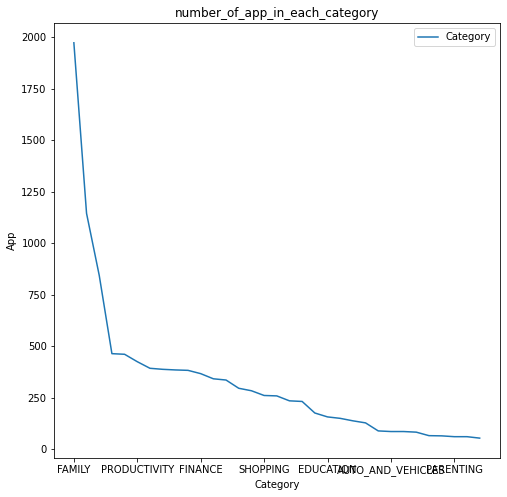

In [ ]:
# plot graph between category and number of apps
number_of_app_in_each_category.plot()


plt.title('number_of_app_in_each_category',{'fontsize':12,'fontweight':30})
plt.ylabel('App',{'fontsize':10,'fontweight':15})
plt.xlabel('Category',{'fontsize':10,'fontweight':15})
plt.rcParams['figure.figsize'] = (8, 8)   

**Number of apps having five star rating and average app Ratings**

In [ ]:
# Find average ratings of apps
average_app_rating= updated_df['Rating'].mean()

In [ ]:
average_app_rating

4.206476014760287

In [ ]:
# maximum rating of apps 
max_rating=updated_df['Rating'].max()

In [ ]:
max_rating

5.0

In [ ]:
# top apps which has five start ratings
five_star_apps=updated_df[updated_df['Rating']==5.0]

In [ ]:
five_star_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price_1,Installs_1,Installs_2
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15.0,37M,"1,000+",Free,0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up,0.0,"1,000",1000.0
612,American Girls Mobile Numbers,DATING,5.0,5.0,4.4M,"1,000+",Free,0,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up,0.0,"1,000",1000.0
615,Awake Dating,DATING,5.0,2.0,70M,100+,Free,0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up,0.0,100,100.0
633,Spine- The dating app,DATING,5.0,5.0,9.3M,500+,Free,0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up,0.0,500,500.0
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6.0,5.0M,100+,Free,0,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up,0.0,100,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,Mad Dash Fo' Cash,GAME,5.0,14.0,16M,100+,Free,0,Everyone,Arcade,"June 19, 2017",2.5a,4.1 and up,0.0,100,100.0
10742,GKPB FP Online Church,LIFESTYLE,5.0,32.0,7.9M,"1,000+",Free,0,Everyone,Lifestyle,"December 31, 2017",0.7.1,4.4 and up,0.0,"1,000",1000.0
10776,Monster Ride Pro,GAME,5.0,1.0,24M,10+,Free,0,Everyone,Racing,"March 5, 2018",2.0,2.3 and up,0.0,10,10.0
10820,Fr. Daoud Lamei,FAMILY,5.0,22.0,8.6M,"1,000+",Free,0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up,0.0,"1,000",1000.0


In [ ]:
# number of five star apps in data
number_of_5_star_app=len(five_star_apps)
number_of_5_star_app

274

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


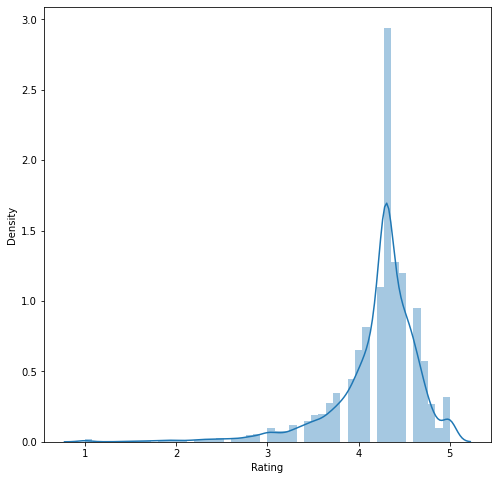

In [ ]:
ratings=updated_df['Rating'];
sns.distplot(ratings, hist=True);

**Highest average rating in category**

In [ ]:
# highest average rating category wise
highest_average_rating = updated_df.groupby('Category')['Rating'].mean().reset_index()
highest_average_rating

,Category,Rating
0,ART_AND_DESIGN,4.355385
1,AUTO_AND_VEHICLES,4.205882
2,BEAUTY,4.283019
3,BOOKS_AND_REFERENCE,4.335498
4,BUSINESS,4.182391
5,COMICS,4.160000
6,COMMUNICATION,4.180103
7,DATING,4.025641
8,EDUCATION,4.388462
9,ENTERTAINMENT,4.126174


In [ ]:
# number of highest average rating in category
len(highest_average_rating)

33

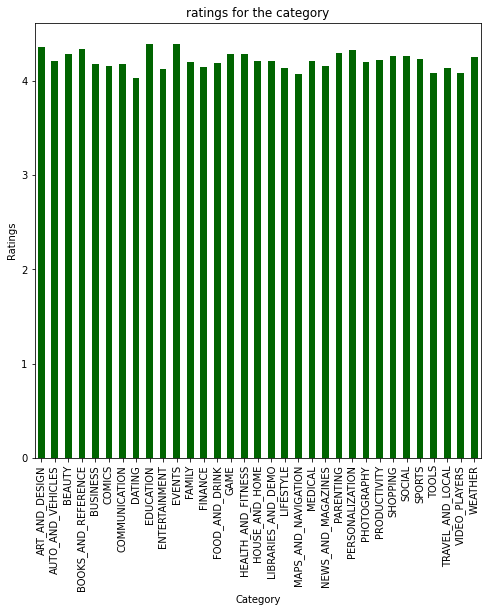

In [ ]:
# plot the graph between rating and category
updated_df.groupby(['Category'])['Rating'].mean().plot.bar(color="darkgreen")
plt.title('ratings for the category')
plt.xlabel('Category')
plt.ylabel('Ratings')
plt.show()

In [ ]:
# top 5 apps which has 5 star ratings
updated_df.nlargest(5,['Rating'])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price_1,Installs_1,Installs_2,Size_1,Size_2
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15.0,37M,"1,000+",Free,0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up,0.0,"1,000",1000.0,37,37
612,American Girls Mobile Numbers,DATING,5.0,5.0,4.4M,"1,000+",Free,0,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up,0.0,"1,000",1000.0,4.4,4.4
615,Awake Dating,DATING,5.0,2.0,70M,100+,Free,0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up,0.0,100,100.0,70,70
633,Spine- The dating app,DATING,5.0,5.0,9.3M,500+,Free,0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up,0.0,500,500.0,9.3,9.3
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6.0,5.0M,100+,Free,0,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up,0.0,100,100.0,5.0,5.0


**Average value of Reviews. which app has maximun Reviews. Top 5 apps having highest Reviews**

In [ ]:
updated_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Price_1', 'Installs_1', 'Installs_2'],
      dtype='object')

In [ ]:
# find datatype of reviews
updated_df['Reviews'].dtype

dtype('float64')

In [ ]:
# average value of reviews
updated_df['Reviews'].mean()

444152.89603321033

In [ ]:
# Top 5 apps which has maximum reviews
top_five_app_has_max_reviews = pd.DataFrame(updated_df['Reviews'].sort_values(ascending=False))

In [ ]:
top_five_app_has_max_reviews.head()

,Reviews
2544,78158306.0
3943,78128208.0
336,69119316.0
381,69119316.0
3904,69109672.0


In [ ]:
# find maximum review from all reviews
updated_df['Reviews'].max()

78158306.0

In [ ]:
# Name of app which has maximum reviews
max_reviews=updated_df[updated_df['Reviews']==updated_df['Reviews'].max()]
max_reviews

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price_1,Installs_1,Installs_2
2544,Facebook,SOCIAL,4.1,78158306.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,0.0,"1,000,000,000",1.000000e+09


In [ ]:
print('the app has maximum reviews is', max_reviews['App'])

the app has maximum reviews is 2544    Facebook
Name: App, dtype: object


In [ ]:
# top 5 apps which has maximum reviews
updated_df.nlargest(5,['Reviews'])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price_1,Installs_1,Installs_2
2544,Facebook,SOCIAL,4.1,78158306.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,0.0,"1,000,000,000",1.000000e+09
3943,Facebook,SOCIAL,4.1,78128208.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,0.0,"1,000,000,000",1.000000e+09
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,0.0,"1,000,000,000",1.000000e+09
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,0.0,"1,000,000,000",1.000000e+09
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,0.0,"1,000,000,000",1.000000e+09


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


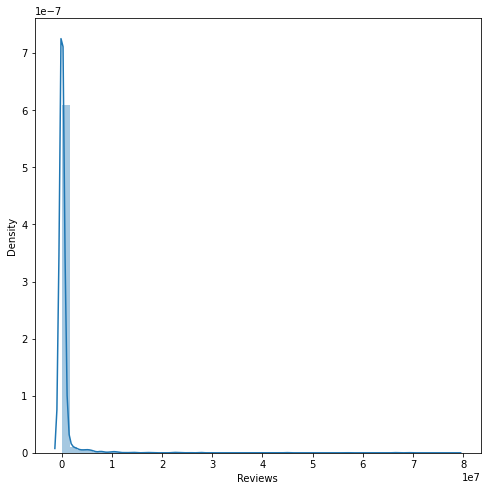

In [ ]:
sns.distplot(updated_df['Reviews'])
plt.show()

**Total number of free and paid apps. Find average Ratings of free and paid apps**

In [ ]:
updated_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Price_1', 'Installs_1', 'Installs_2'],
      dtype='object')

In [ ]:
# Number of free and paid apps in data and its datatype
updated_df['Type'].value_counts()

Free    10040
Paid      800
Name: Type, dtype: int64

In [ ]:
# Average rating of free and paid apps
average_ratings=updated_df.groupby('Type')['Rating'].mean()
average_ratings

Type
Free    4.201175
Paid    4.273000
Name: Rating, dtype: float64

In [ ]:
pd.DataFrame(average_ratings)

,Rating
Type,
Free,4.201175
Paid,4.273000


Text(0, 0.5, 'Rating ')

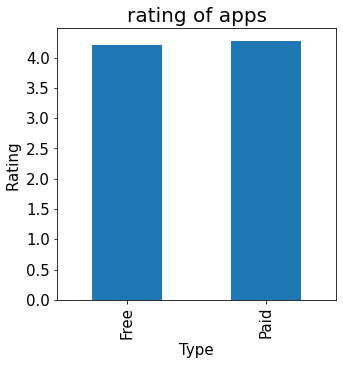

In [ ]:
# plot a graph between types of app and average ratings of apps

ax = average_ratings.plot.bar(figsize = (5,5),fontsize = 15)

# Set the title
ax.set_title("rating of apps", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Type", fontsize = 15)
ax.set_ylabel("Rating ", fontsize = 15)


**Top 5 apps which has maximum installs**

In [ ]:
# Check data type of installs
updated_df['Installs_2'].dtype

dtype('float64')

In [ ]:
# find top 5 install apps in data by users
updated_df.nlargest(5,['Installs_2'])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price_1,Installs_1,Installs_2
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,Varies with device,"1,000,000,000+",Free,0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device,0.0,"1,000,000,000",1.000000e+09
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,0.0,"1,000,000,000",1.000000e+09
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,0.0,"1,000,000,000",1.000000e+09
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,0.0,"1,000,000,000",1.000000e+09
340,Gmail,COMMUNICATION,4.3,4604324.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,0.0,"1,000,000,000",1.000000e+09


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


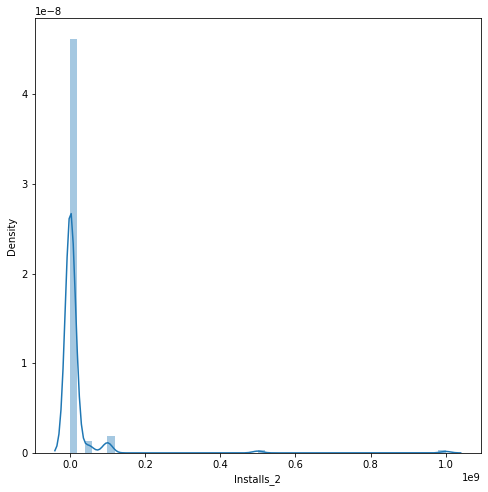

In [ ]:
sns.distplot(updated_df['Installs_2'])
plt.show()

**Top content rating values**

In [ ]:
# Various number of user used these apps
updated_df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

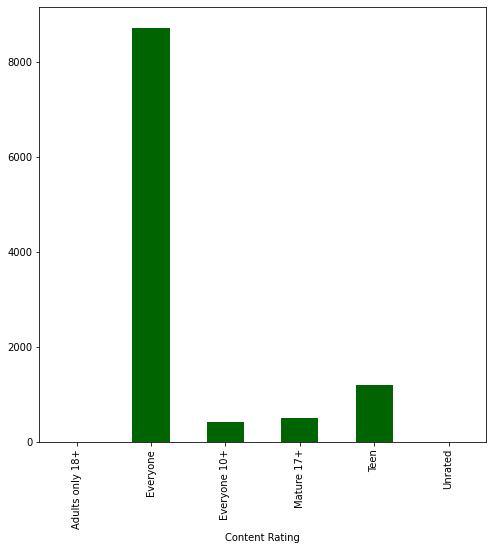

In [ ]:
# plot graph for the user uses these apps
updated_df.groupby(['Content Rating'])['Rating'].count().plot.bar(color="darkgreen")
plt.show()

**Plotting the graph between category and price, category and installs and category and reviews**

In [ ]:
grp = updated_df.groupby('Category')
x = grp['Installs_2'].agg(np.mean)
y = grp['Price_1'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         1.912894e+06
AUTO_AND_VEHICLES      6.250613e+05
BEAUTY                 5.131519e+05
BOOKS_AND_REFERENCE    8.318050e+06
BUSINESS               2.178076e+06
COMICS                 9.347692e+05
COMMUNICATION          8.435989e+07
DATING                 1.129533e+06
EDUCATION              5.586231e+06
ENTERTAINMENT          1.925611e+07
EVENTS                 2.495806e+05
FAMILY                 5.201959e+06
FINANCE                2.395215e+06
FOOD_AND_DRINK         2.156683e+06
GAME                   3.066960e+07
HEALTH_AND_FITNESS     4.642441e+06
HOUSE_AND_HOME         1.917187e+06
LIBRARIES_AND_DEMO     7.411284e+05
LIFESTYLE              1.407444e+06
MAPS_AND_NAVIGATION    5.286729e+06
MEDICAL                1.150269e+05
NEWS_AND_MAGAZINES     2.648876e+07
PARENTING              5.253518e+05
PERSONALIZATION        5.932385e+06
PHOTOGRAPHY            3.011417e+07
PRODUCTIVITY           3.343418e+07
SHOPPING               1.249173e+07
SOCIAL             

Text(0, 0.5, 'Intalls_2')

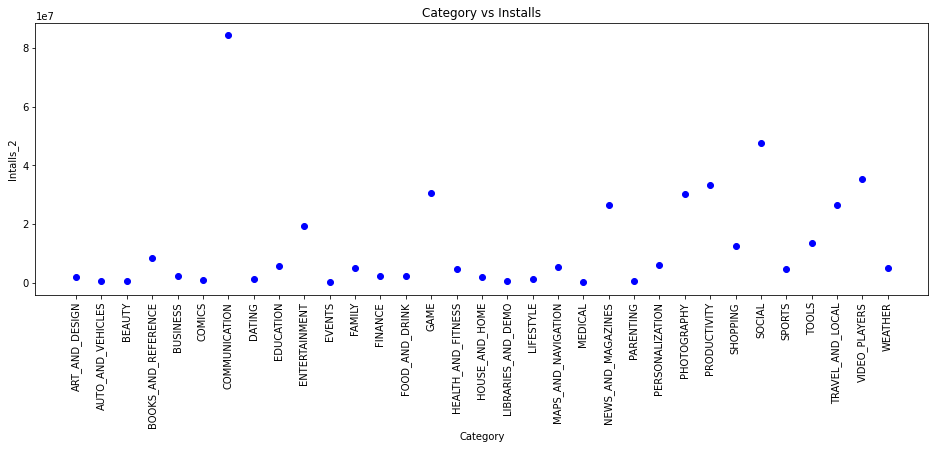

In [ ]:
# Plot the graph between category of apps and installed the apps
plt.figure(figsize=(16,5))
plt.plot(x, 'ro', color='b')
plt.xticks(rotation=90)
plt.title('Category vs Installs')
plt.xlabel('Category')
plt.ylabel('Intalls_2')

Text(0, 0.5, 'Price_1')

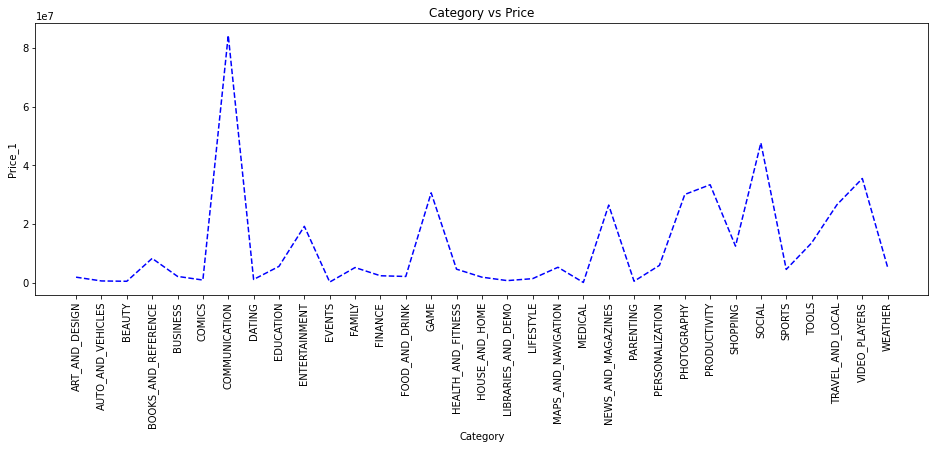

In [ ]:
# plot the graph between category of apps and price of the apps
plt.figure(figsize=(16,5))
plt.plot(x, 'r--', color='b')
plt.xticks(rotation=90)
plt.title('Category vs Price')
plt.xlabel('Category')
plt.ylabel('Price_1')

Text(0, 0.5, 'Reviews')

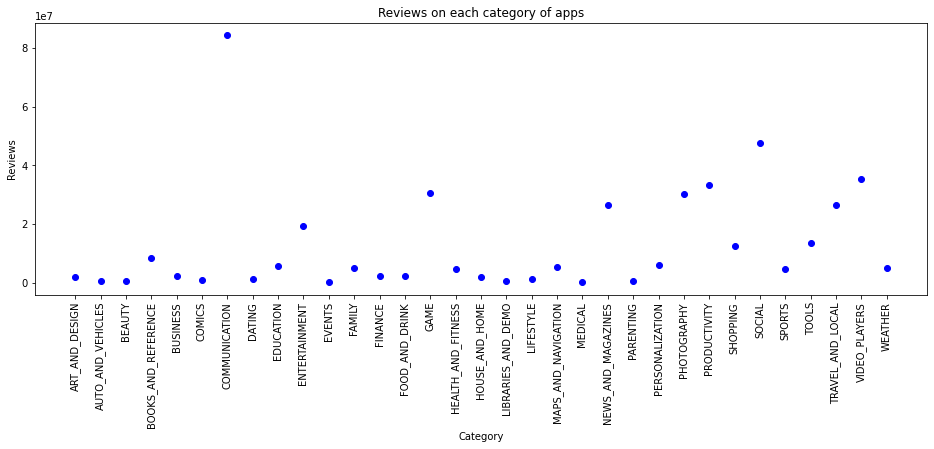

In [ ]:
# Plot the graph between category of apps and reviews of apps
plt.figure(figsize=(16,5))
plt.plot(x, 'ro', color='b')
plt.xticks(rotation=90)
plt.title('Reviews on each category of apps')
plt.xlabel('Category')
plt.ylabel('Reviews')

#**Conclusions**

***From the database it is concluded that:***

****



**1. There are 10040 Free apps and 800 Paid apps in the database which has 4.2 and 4.27 rating respectively.**

**2. Communication Category apps has maximum installs.**

**3. Events and Education Category apps has maximum ratings**

**4. Communication category apps has maximum price too.**

**5. Facebook and WhatsApp Messanger app has maximum Reviews.**

**6. Maximum price of the app is I'm Rich-Trump Edition.** 

**7. Top 5 maximum installs apps are:**

i) Google play Books

ii) Messanger-Text and Video for Free

iii) WhatsApp Messanger

iv) Google Chrome: Fast and Secure

v) Gmail

**8. There are 274 apps which has 5 star ratings.**

**9. total apps are divided into 33 number of categories.**

**10. Apps are divided into two types**

i) Free Apps

ii) Paid Apps